# 가중치 초기화 문제 해결법 
(p.205)

초기 가중치에 따른 활성화값의 변화 때문에 생기는 문제들이었음 [link](https://github.com/DoranLyong/Start_deepLearning_from_floor-/blob/master/Ch6_Learning_technique(optimization)/L7-1_weights_init_problem.ipynb)<br/> <br/>
(1) 기울기 감소/소실 문제 <br/>

(2) 표현력 제한 문제   


***

# Xavier 초깃값 

현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있음 

<b>\[ Xavier 초깃값 \] </b>
> 사비에르 글로로트<sup>Xavier Glorot</sup>와 요슈아 벤지오<sup>Yoshua Bengio</sup>가 제안함 
 * Understanding the difficulty of training deep feedforward neural networks(2010)

이 논문은 <b>각 층의 활성화값들을 광범위하게 분포시킬 목적으로</b> 가중치의 적절한 분포를 찾고자 했음 
* (p.205) 활성화 값들이 적절하게 고루 분포해야 한다

> 결과물:  앞 계층의 노드가 n개라면 $\;$ ⇒ $\;$표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용하면 된다 

![Xavier초깃값](./images/fig_6-12.png)

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 분포함 

***
__Example__: Xavier 초깃값을 써서 실험해봄 <br/> <br/>

코드에서 가중치 초깃값 설정 부분을 고쳐주기만 하면 됨 

In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 
    
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data

In [2]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)   # Xavier 초깃값 


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

__히스토그램 그리기__

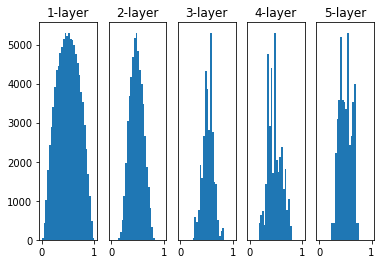

In [3]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


이 결과를 보면 층이 깊어질수록 형태가 다소 일그러지지만, <br/>
[앞에서 본 방식](https://github.com/DoranLyong/Start_deepLearning_from_floor-/blob/master/Ch6_Learning_technique(optimization)/L7-1_weights_init_problem.ipynb)보다는 확실히 넓게 분포됨 

> 각 층에 흐르는 데이터가 <span style="color:red">적당히 퍼져 있으므로</span>, <br/>
 * 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대됨 

***
### [정리] 
Activation function: sigmoid 활용 <br/>

(1) 초기 가중치를 표준편차 1인 정규분포로 뽑을 때, 
> * __가중치 감소__ 문제  → 결국 역전파 때 기울기 0 → 가중치 갱신 불가 <br> <br/>

(2) 표준편차 0.01인 정규분포로 뽑을 때,
> * 비슷한 활성화 값들만 흐름  → __표현력 제한__ 문제 

(3) Xavier 초깃값을 사용하니? 
> * 각 층의 활성화 값이 고르게 분포해서 위의 문제가 발생하지 않음 

***

# ※ tanh 함수 (쌍곡선 함수)

위의 히스토그램을 보면 

계층이 깊어질수록 활성화 값 분포가 약간 일그러짐 
> 이 일그러짐은 화럿ㅇ화 함수로 __tanh 함수__(쌍곡선 함수)를 이용함녀 개선됨 

### 활성화 함수용으로 원점에서 대칭인 함수가 바람직하다고 알려짐 
* sigmoid function : (x, y) = (0, 0.5)에서 대칭인 S 곡선 <br/> <br> 

* tanh function : (x, y) = (0, 0)에서 대칭인 S 곡선 